<a href="https://colab.research.google.com/github/SamuGalli/DIQ/blob/main/DIQproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DATA QUALITY ASSESSMENT**

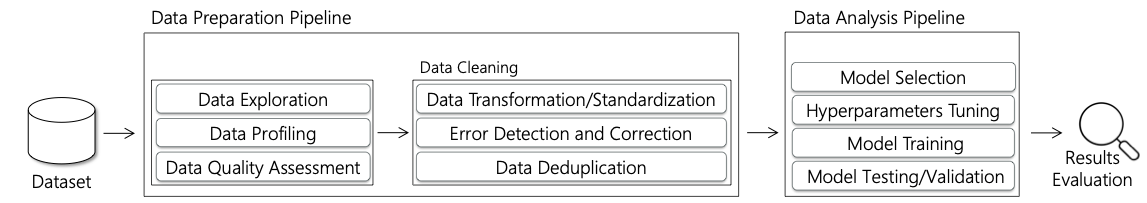

Import libraries:

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime


Import data:

In [3]:
HOTELS = pd.read_csv(
    "https://raw.githubusercontent.com/SamuGalli/DIQ/main/Comune-di-Milano---Strutture-ricettive-alberghiere.csv",
    sep=';',
    encoding='unicode_escape'
)
HOTELS.head()


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8.0,5144.0,6.0,14.0,NaN,4,HOTEL MAISON BORELLA,NaN,NaN,25.0,NaN,Albergo
1,codvia 0000 num.024 ; (),NaN,NaN,NaN,NaN,NaN,259.0,259,4,radisson blu hotel milan,NaN,NaN,518.0,518,Albergo
2,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18.0,2129.0,3.0,16.0,16,1,hotel aurora,1.0,1,25.0,25,Albergo
3,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26.0,2129.0,3.0,25.0,NaN,3,hotel buenos aires,NaN,NaN,39.0,NaN,Albergo
4,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2.0,2129.0,3.0,46.0,15;11;8,3,albergo fenice,4.0,1;2;3;4,98.0,24;19;13,Albergo


In [4]:
#number of tuples and columns of the data source
HOTELS.shape

(451, 15)

In [5]:
#show the schema of the data source
HOTELS.columns

Index(['Ubicazione', 'Tipo via', 'Descrizione via', 'Civico', 'Codice via',
       'ZD', 'Camere', 'Camere piano', 'Categoria', 'Insegna', 'Piani totali',
       'Piano piano', 'Posti letto', 'Posti letto per piano',
       'Tipo attività struture extra'],
      dtype='object')

In [6]:
#for each attribute the system shows the type of data. The type of data is defined analyzing the values
HOTELS.dtypes

Ubicazione                       object
Tipo via                         object
Descrizione via                  object
Civico                          float64
Codice via                      float64
ZD                              float64
Camere                          float64
Camere piano                     object
Categoria                        object
Insegna                          object
Piani totali                    float64
Piano piano                      object
Posti letto                     float64
Posti letto per piano            object
Tipo attività struture extra     object
dtype: object

In [7]:
#unique display the list of distinct values in a column
HOTELS['Posti letto'].unique()

array([ 25., 518.,  39.,  98.,  97., 191.,  60.,  67., 180., 100., 147.,
       159., 172., 203.,  81.,  70.,  43.,  46., 167.,  35.,  96., 308.,
       211., 216.,  18.,  15.,  64., 150., 530.,  95.,  41.,  48.,  79.,
        20.,  16.,  56.,  31.,  33.,  24., 244., 189., 725., 623., 441.,
       110., 448., 650.,  23., 208., 395., 212., 305.,  57.,  78.,  38.,
       432.,  22., 158., 125., 259.,  12., 272.,  19.,  45.,  32.,  68.,
       108.,  99., 120.,  21.,   9.,  94.,  93.,  42.,  58.,  17., 163.,
        10., 465., 145., 132.,  36.,  92.,   7., 199.,  27., 111.,  26.,
        73.,  52.,  59., 234.,  50., 245.,  75., 290., 115., 102.,  47.,
       224., 292., 288., 101., 636., 118.,  77., 205., 468., 196., 469.,
       240., 198., 218., 169.,  28., 232., 200., 736., 229.,  82., 242.,
       480.,  14.,  44., 183., 190., 104.,  62.,  76., 487.,  61., 416.,
       262., 133., 266., 206., 439., 252., 160.,  53.,  54.,  34.,  63.,
        40.,  91.,  65., 204., 306.,  69.,  80.,  5

In [8]:
#nunique counts the number of distinct values of a certain column
HOTELS['Ubicazione'].nunique()

438

In [9]:
#nunique counts the number of distinct values of a certain column
HOTELS['Tipo via'].nunique()

8

In [10]:
#nunique counts the number of distinct values of a certain column
HOTELS['Descrizione via'].nunique()

300

In [11]:
#nunique counts the number of distinct values of a certain column
HOTELS['Civico'].nunique()

90

In [12]:
#nunique counts the number of distinct values of a certain column
HOTELS['Codice via'].nunique()

302

In [13]:
#nunique counts the number of distinct values of a certain column
HOTELS['ZD'].nunique()

9

In [14]:
#nunique counts the number of distinct values of a certain column
HOTELS['Camere'].nunique()

148

In [15]:
#nunique counts the number of distinct values of a certain column
HOTELS['Camere piano'].nunique()

207

In [16]:
#nunique counts the number of distinct values of a certain column
HOTELS['Categoria'].nunique()

8

In [17]:
#nunique counts the number of distinct values of a certain column
HOTELS['Insegna'].nunique()

437

In [18]:
#nunique counts the number of distinct values of a certain column
HOTELS['Piani totali'].nunique()

11

In [19]:
#nunique counts the number of distinct values of a certain column
HOTELS['Piano piano'].nunique()

58

In [20]:
#nunique counts the number of distinct values of a certain column
HOTELS['Posti letto'].nunique()

196

In [21]:
#nunique counts the number of distinct values of a certain column
HOTELS['Posti letto per piano'].nunique()

219

In [22]:
#nunique counts the number of distinct values of a certain column
HOTELS['Tipo attività struture extra'].nunique()

3

In [ ]:
#value_counts() returns an object containing counts for each unique value
UBICAZIONE_COUNT = HOTELS['Ubicazione'].value_counts()

Ubicazione
VLE DEI MILLE N. 48 (z.d. 3)                                     3
VIA LAZZARETTO N. 17 (z.d. 2)                                    2
VIA FRA' GALGARIO N. 4 (z.d. 7)                                  2
PZA DELLA REPUBBLICA N. 17 (z.d. 2)                              2
VIA AOSTA N. 2 (z.d. 8)                                          2
                                                                ..
CSO LODI N. 74 (z.d. 4)                                          1
CSO MAGENTA N. 61 (z.d. 1)                                       1
CSO MAGENTA N. 78 (z.d. 1)                                       1
CSO MAGENTA num.019 ; (z.d. 1)                                   1
CSO MATTEOTTI GIACOMO num.004/6 cinque stelle lusso; (z.d. 1)    1
Name: count, Length: 438, dtype: int64

In [ ]:
UBICAZIONE_COUNT.head(100)

Ubicazione
VLE DEI MILLE N. 48 (z.d. 3)             3
VIA LAZZARETTO N. 17 (z.d. 2)            2
VIA FRA' GALGARIO N. 4 (z.d. 7)          2
PZA DELLA REPUBBLICA N. 17 (z.d. 2)      2
VIA AOSTA N. 2 (z.d. 8)                  2
                                        ..
VIA CALVI PIETRO N. 32 (z.d. 4)          1
VIA CANONICA LUIGI N. 38 (z.d. 1)        1
VIA CANONICA LUIGI N. 79 (z.d. 8)        1
VIA CAPPELLINI ALFREDO N. 18 (z.d. 2)    1
VIA CARCANO FILIPPO N. 37 (z.d. 7)       1
Name: count, Length: 100, dtype: int64

In [28]:
VIA_COUNT = HOTELS['Tipo via'].value_counts()
VIA_COUNT

Tipo via
VIA    331
VLE     47
CSO     25
PZA     24
PLE      4
LGO      3
GLL      2
ALZ      1
Name: count, dtype: int64

In [32]:
DESCRIZIONE_COUNT = HOTELS['Descrizione via'].value_counts()
DESCRIZIONE_COUNT

Descrizione via
TORRIANI NAPO             10
PORPORA NICOLA ANTONIO     8
VITRUVIO                   7
BUENOS AIRES               6
DEI MILLE                  5
                          ..
SUZZANI GIOVANNI           1
TESTI FULVIO               1
CONCORDIA                  1
VITTORIO VENETO            1
NAVIGLIO GRANDE            1
Name: count, Length: 300, dtype: int64

In [33]:
CIVICO_COUNT = HOTELS['Civico'].value_counts()
CIVICO_COUNT

Civico
2.0        22
6.0        22
4.0        19
10.0       16
3.0        15
           ..
41609.0     1
120.0       1
139.0       1
300.0       1
89.0        1
Name: count, Length: 90, dtype: int64

In [44]:
CODICE_VIA_COUNT = HOTELS['Codice via'].value_counts()
CODICE_VIA_COUNT

Codice via
2126.0    10
2229.0     8
2134.0     7
2129.0     5
3115.0     5
          ..
1446.0     1
1441.0     1
3116.0     1
2107.0     1
5144.0     1
Name: count, Length: 302, dtype: int64

In [45]:
ZD_COUNT = HOTELS['ZD'].value_counts()
ZD_COUNT

ZD
3.0    111
2.0     75
1.0     69
8.0     44
9.0     34
7.0     32
4.0     30
5.0     25
6.0     17
Name: count, dtype: int64

In [46]:
CAMERE_COUNT = HOTELS['Camere'].value_counts()
CAMERE_COUNT

Camere
10.0     24
14.0     15
11.0     15
15.0     14
13.0     11
         ..
126.0     1
143.0     1
120.0     1
420.0     1
140.0     1
Name: count, Length: 148, dtype: int64

In [47]:
CAMERE_PIANO_COUNT = HOTELS['Camere piano'].value_counts()
CAMERE_PIANO_COUNT

Camere piano
0                   108
8                     4
7                     4
11                    4
13                    4
                   ... 
30;11                 1
33                    1
15;15;15;15;15;9      1
3;6;9;9;9             1
12;7;4                1
Name: count, Length: 207, dtype: int64

In [48]:
CATEGORIA_COUNT = HOTELS['Categoria'].value_counts()
CATEGORIA_COUNT

Categoria
4                 147
3                 135
1                  83
2                  64
5                   7
l                   3
I                   3
5 STELLE LUSSO      2
Name: count, dtype: int64

In [49]:
INSEGNA_COUNT = HOTELS['Insegna'].value_counts()
INSEGNA_COUNT

Insegna
radisson blu hotel milan    2
leonardo da vinci           2
ambrosiana                  2
hotel minerva               2
murillo                     1
                           ..
hotel del sud               1
palazzo delle stelline      1
antica locanda leonardo     1
hotel king                  1
starhotels E.C.H.O.         1
Name: count, Length: 437, dtype: int64

In [51]:
PIANI_TOT_COUNT = HOTELS['Piani totali'].value_counts()
PIANI_TOT_COUNT

Piani totali
3.0     37
4.0     36
5.0     24
7.0     20
6.0     20
1.0     17
2.0     13
8.0     12
9.0      5
17.0     2
10.0     1
Name: count, dtype: int64

In [52]:
PIANO_PIANO_COUNT = HOTELS['Piano piano'].value_counts()
PIANO_PIANO_COUNT

Piano piano
1;2;3;4;5              17
T;1;2                  16
1;2;3;4;5;6            16
1;2;3;4;5;6;7          14
1;2;3;4                14
1;2;3                  11
1                       9
T;1;2;3                 9
R;1;2                   8
1;2                     6
1;2;3;4;5;6;7;8         6
1;2;3;4;5;6;7;8;9;0     5
R;1                     5
R;1;2;3                 5
T;1;2;3;4;5             5
T;1;2;3;4               4
R;1;2;3;4;5             3
;                       2
R;1;2;3;4;5;6;7         2
1;2;3;4;5;6;7;8;9       2
;1;2                    2
T;1;2;3;4;5;6           2
3;4;5;6;7;8;9           1
3;4;5;6;7;8;2;9;0       1
2;3;4;5                 1
1;6;2;5;4;7;3           1
R;2;3                   1
1;2;5;6;7               1
R;1;2;3;4               1
4;5;3;1;2               1
A;1;2;3;4;5;6;7;8;9     1
1;2;3;4;5;A             1
T;1                     1
1;2;3;4;5;8;7           1
2;3;4;5;6;7;8;9         1
R;1;M;2                 1
2;1;R;4;;3              1
R;1;2;M                 1


In [53]:
POSTI_LETTO_COUNT = HOTELS['Posti letto'].value_counts()
POSTI_LETTO_COUNT

Posti letto
25.0     35
20.0     15
24.0     14
23.0     11
32.0      9
         ..
55.0      1
135.0     1
792.0     1
344.0     1
250.0     1
Name: count, Length: 196, dtype: int64

In [54]:
TIPO_ATTIVITA_COUNT = HOTELS['Tipo attività struture extra'].value_counts()
TIPO_ATTIVITA_COUNT

Tipo attività struture extra
Albergo      386
Residence     51
albergo        4
Name: count, dtype: int64

In [29]:
#here we want to inspect how many unique values have the same count
VIA_COUNT.value_counts()

count
331    1
47     1
25     1
24     1
4      1
3      1
2      1
1      1
Name: count, dtype: int64

**DUPLICATION**

Duplication occurs when a real-world entity is stored twice or more in a data source.

*Definition*: A measure of unwanted duplication existing within a data set.

*Evaluation*: Number of duplicates

In [55]:
#duplicated returns a boolean Series denoting the duplicate rows (exact matching)
DUPLICATES = HOTELS.duplicated()
DUPLICATES

0      False
1      False
2      False
3      False
4      False
       ...  
446    False
447    False
448    False
449    False
450    False
Length: 451, dtype: bool

In [56]:
#any shows if duplicates exist
print(DUPLICATES.any())

False


In [57]:
HOTELS[DUPLICATES]

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra


**COMPLETENESS**

The completeness of a table characterizes the extent to which a table represents the corresponding real world.

Completeness in the relational model can be characterized by the presence of null values. In a model with null values, the presence of a null value has the general meaning of a missing value, i.e., a value that exist in the real-world but it is not available.

*Definition*: The degree to which a given data collection includes the data describing the corresponding set of real-world objects.

*Evaluation*: Number of not null values / Total number of values

In [34]:
#isnull() shows which values are null
HOTELS.isnull()

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False
1,False,True,True,True,True,True,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
447,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
448,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False
449,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False


In [35]:
#display the number of not null values for each column
HOTELS.count()

Ubicazione                      451
Tipo via                        437
Descrizione via                 437
Civico                          421
Codice via                      437
ZD                              437
Camere                          450
Camere piano                    345
Categoria                       444
Insegna                         441
Piani totali                    187
Piano piano                     199
Posti letto                     450
Posti letto per piano           345
Tipo attività struture extra    441
dtype: int64

In [37]:
#total number of not null values
NOT_NULL = HOTELS.count().sum()
print(NOT_NULL)

5922


In [38]:
#display the number of null values for each column
HOTELS.isnull().sum()

Ubicazione                        0
Tipo via                         14
Descrizione via                  14
Civico                           30
Codice via                       14
ZD                               14
Camere                            1
Camere piano                    106
Categoria                         7
Insegna                          10
Piani totali                    264
Piano piano                     252
Posti letto                       1
Posti letto per piano           106
Tipo attività struture extra     10
dtype: int64

In [39]:
#total number of null values
NULL = HOTELS.isnull().sum().sum()
print(NULL)

843


In [40]:
#total number of cells
TOT = HOTELS.shape[0]*HOTELS.shape[1]
TOT

6765

In [41]:
TOT = NOT_NULL + NULL
print(TOT)

6765


COMPLETENESS EVALUATION:

In [42]:
COMPLETENESS = NOT_NULL / TOT
COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
print(COMPLETENESS)

87.5%


**ACCURACY**

*Definition*: The extent to which data are correct, reliable and certified.

Syntactic Accuracy is the closeness of a value v to the elements of the corresponding definition domain D.

Semantic Accuracy is defined as the closeness between a data value v and a data value v’.

It is possible to calculate the accuracy of an attribute, i.e., attribute (or column) accuracy, of a relation, i.e., relation accuracy, or of a whole database, i.e., database accuracy.

*Evaluation*: Number of accurate values / Total number of values

In [ ]:
#the styles data source contains the list of correct values for the attribute style in beers
STYLES = pd.read_csv('https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/STYLES.csv')
STYLES

,style
0,American Pale Lager
1,American Pale Ale (APA)
2,American IPA
3,American Double / Imperial IPA
4,American IPA
...,...
2405,Belgian IPA
2406,American Amber / Red Ale
2407,Schwarzbier
2408,American Pale Ale (APA)


In [ ]:
#now we check if the values attribute style in beers contain errors
BEERS = pd.read_csv('https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/BEERS.csv')

In [ ]:
#correct values in beers are the ones contained in styles
CORRECT = BEERS['style'].isin(STYLES['style'])
CORRECT

,style
0,True
1,True
2,True
3,True
4,True
...,...
2414,True
2415,True
2416,True
2417,True


In [ ]:
#we sum the true values in correct
CORRECT_STYLE = np.sum(CORRECT)
CORRECT_STYLE

2406

In [ ]:
#we count the not null values of the column style in beers
NOT_NULL_STYLE = BEERS['style'].count()
NOT_NULL_STYLE

2414

ACCURACY EVALUATION:

In [ ]:
ACCURACY_STYLE = CORRECT_STYLE/NOT_NULL_STYLE
ACCURACY_STYLE = '{0:.1f}%'.format(ACCURACY_STYLE*100)
print(ACCURACY_STYLE)

99.7%


In [ ]:
#we assume that the values of attribute ibu in beers are correct only if they belong to a 5 to 100 range
RANGE_CORRECT = range(5,100)

In [ ]:
#check Accuracy of ibu considering the acceptance range
CORRECT_IBU = sum(1 for item in BEERS['ibu'] if item in RANGE_CORRECT)
CORRECT_IBU

1360

In [ ]:
NOT_NULL_IBU = BEERS['ibu'].count()
NOT_NULL_IBU

1412

In [ ]:
ACCURACY_IBU = CORRECT_IBU/NOT_NULL_IBU
ACCURACY_IBU = '{0:.1f}%'.format(ACCURACY_IBU*100)
print(ACCURACY_IBU)

96.3%


**TIMELINESS**

*Definition*: The extent to which age of the data is appropriate for the task at hand.

Timeliness has two components: currency and volatility. Currency is a measure of how old the information is, based on how long ago it was recorded. Volatility is a measure of information instability/the frequency of change of the value for an entity attribute.
Currency = Age + (Delivery Time - Input Time)

*Evaluation*: Max(0, 1 - Currency/Volatility)

In [ ]:
dateparse = lambda x: datetime.strptime(str(x), '%d/%m/%Y')
PROPERTY = pd.read_csv('https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/PROPERTY.csv', parse_dates=['TS_UPDATE'], date_parser=dateparse)

<ipython-input-43-1895d6336265>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  PROPERTY = pd.read_csv('https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/PROPERTY.csv', parse_dates=['TS_UPDATE'], date_parser=dateparse)


In [ ]:
PROPERTY

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,TS_UPDATE
0,100001000,104.0,PUTNAM,Y,3,1,1000,2022-08-11
1,100002000,197.0,LEXINGTON,N,3,1.5,--,2022-06-22
2,100003000,NaN,LEXINGTON,N,NaN,1,850,2022-09-10
3,100004000,201.0,BERKELEY,12,1,NaN,700,2022-08-16
4,100005000,203.0,BERKELEY,Y,3,2,1600,2022-08-31
5,100006000,207.0,BERKELEY,Y,NaN,1,800,2022-09-15
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950,2022-08-21
7,100008000,213.0,TREMONT,Y,1,1,70,2022-07-12
8,100009000,215.0,TREMONT,Y,na,2,1800,2022-07-25
9,100010000,216.0,BERELEY,Y,1,3,10,2022-09-27


In [ ]:
PROPERTY.dtypes

,0
ID,int64
ST_NUM,float64
ST_NAME,object
OWN_OCCUPIED,object
NUM_BEDROOMS,object
NUM_BATH,object
SQ_FT,object
TS_UPDATE,datetime64[ns]


In [ ]:
#we assume that Volatility (the time in which information is valid in the real-world) is 80 days
#we assume also that the data are stored immediately (age = 0)
#now we compute the Currency and we add a column with its value for each tuple
VOLATILITY = 80
today = datetime(2023, 10, 3)
today

datetime.datetime(2023, 10, 3, 0, 0)

In [ ]:
PROPERTY['currency'] = today - PROPERTY['TS_UPDATE']
PROPERTY

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,TS_UPDATE,currency
0,100001000,104.0,PUTNAM,Y,3,1,1000,2022-08-11,418 days
1,100002000,197.0,LEXINGTON,N,3,1.5,--,2022-06-22,468 days
2,100003000,NaN,LEXINGTON,N,NaN,1,850,2022-09-10,388 days
3,100004000,201.0,BERKELEY,12,1,NaN,700,2022-08-16,413 days
4,100005000,203.0,BERKELEY,Y,3,2,1600,2022-08-31,398 days
5,100006000,207.0,BERKELEY,Y,NaN,1,800,2022-09-15,383 days
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950,2022-08-21,408 days
7,100008000,213.0,TREMONT,Y,1,1,70,2022-07-12,448 days
8,100009000,215.0,TREMONT,Y,na,2,1800,2022-07-25,435 days
9,100010000,216.0,BERELEY,Y,1,3,10,2022-09-27,371 days


In [ ]:
PROPERTY['currency'] = PROPERTY['currency'].dt.days
PROPERTY

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,TS_UPDATE,currency
0,100001000,104.0,PUTNAM,Y,3,1,1000,2022-08-11,418
1,100002000,197.0,LEXINGTON,N,3,1.5,--,2022-06-22,468
2,100003000,NaN,LEXINGTON,N,NaN,1,850,2022-09-10,388
3,100004000,201.0,BERKELEY,12,1,NaN,700,2022-08-16,413
4,100005000,203.0,BERKELEY,Y,3,2,1600,2022-08-31,398
5,100006000,207.0,BERKELEY,Y,NaN,1,800,2022-09-15,383
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950,2022-08-21,408
7,100008000,213.0,TREMONT,Y,1,1,70,2022-07-12,448
8,100009000,215.0,TREMONT,Y,na,2,1800,2022-07-25,435
9,100010000,216.0,BERELEY,Y,1,3,10,2022-09-27,371


In [ ]:
#adding a column with the Timeliness computation
#if Volatility is greater than Currency the Timeliness is equal to 1 - Currency / Volatility, otherwise is 0
PROPERTY['Timeliness'] = np.where(VOLATILITY>PROPERTY['currency'],
                                       1-(PROPERTY['currency']/VOLATILITY),
                                       0)
PROPERTY

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,TS_UPDATE,currency,Timeliness
0,100001000,104.0,PUTNAM,Y,3,1,1000,2022-08-11,418,0.0
1,100002000,197.0,LEXINGTON,N,3,1.5,--,2022-06-22,468,0.0
2,100003000,NaN,LEXINGTON,N,NaN,1,850,2022-09-10,388,0.0
3,100004000,201.0,BERKELEY,12,1,NaN,700,2022-08-16,413,0.0
4,100005000,203.0,BERKELEY,Y,3,2,1600,2022-08-31,398,0.0
5,100006000,207.0,BERKELEY,Y,NaN,1,800,2022-09-15,383,0.0
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950,2022-08-21,408,0.0
7,100008000,213.0,TREMONT,Y,1,1,70,2022-07-12,448,0.0
8,100009000,215.0,TREMONT,Y,na,2,1800,2022-07-25,435,0.0
9,100010000,216.0,BERELEY,Y,1,3,10,2022-09-27,371,0.0


In [ ]:
print("Average Timeliness: ", PROPERTY['Timeliness'].mean())
print("Maximum  Timeliness:", PROPERTY['Timeliness'].max())
print("Minimum Timeliness:", PROPERTY['Timeliness'].min())

Average Timeliness:  0.0
Maximum  Timeliness: 0.0
Minimum Timeliness: 0.0


**CONSISTENCY**

The consistency dimension captures the violation of semantic rules defined over (a set of) data items, where items can be tuples of relational tables or records in a file.

Semantic rules can be integrity constaints, data edits or business rules.

*Definition*: The satisfaction of semantic rules defined over a set of data items.

*Evaluation*: Number of consistent tuples / Total number of tuples

In [ ]:
PROPERTY = pd.read_csv('https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/PROPERTY.csv')

In [ ]:
#we define a rule that the number of bathrooms should be lower than the number of bedrooms
#we add the column consistency
#we assign the value 1 if the rule is satisfied, 0 otherwise
PROPERTY['consistency'] = np.where(PROPERTY['NUM_BATH']>=PROPERTY['NUM_BEDROOMS'],
                                      0,
                                      1)
PROPERTY

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,TS_UPDATE,consistency
0,100001000,104.0,PUTNAM,Y,3,1,1000,11/8/2022,1
1,100002000,197.0,LEXINGTON,N,3,1.5,--,22/6/2022,1
2,100003000,NaN,LEXINGTON,N,NaN,1,850,10/9/2022,1
3,100004000,201.0,BERKELEY,12,1,NaN,700,16/8/2022,1
4,100005000,203.0,BERKELEY,Y,3,2,1600,31/8/2022,1
5,100006000,207.0,BERKELEY,Y,NaN,1,800,15/9/2022,1
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950,21/8/2022,0
7,100008000,213.0,TREMONT,Y,1,1,70,12/7/2022,0
8,100009000,215.0,TREMONT,Y,na,2,1800,25/7/2022,1
9,100010000,216.0,BERELEY,Y,1,3,10,27/9/2022,0


In [ ]:
#count the number of consistent tuples considering the rule
CONSISTENT = PROPERTY['consistency'] == 1
CONSISTENT = CONSISTENT.sum()

In [ ]:
#count the total number of tuples in the property dataset
COUNT = PROPERTY['consistency'].count()
COUNT

12

CONSISTENCY EVALUATION:

In [ ]:
CONSISTENCY = CONSISTENT / COUNT
CONSISTENCY = '{0:.1f}%'.format(CONSISTENCY * 100)
print(CONSISTENCY)

66.7%


**Summary:**

*General information on data*
- pandas.read_csv()
- DataFrame.shape()
- DataFrame.columns()
- DataFrame.head()
- DataFrame.dtypes()
- DataFrame.unique()
- DataFrame.nunique()
- DataFrame.value_counts()

*Duplication*
- DataFrame.duplicated()

*Completeness*
- DataFrame.isnull()
- DataFrame.count()
- DataFrame.sum()

*Accuracy*
- DataFrame.isin()
- range()
- numpy.sum()

*Timeliness*
- numpy.where()
- DataFrame.min(), DataFrame.max(), DataFrame.mean()
- datetime.strptime()
- DataFrame.dt.days()